# `Практикум по программированию на языке Python`
<br>

## `Занятие 6: Представление, обработка, анализ и визуализация данных`
<br><br>

### `Мурат Апишев (mel-lain@yandex.ru)`

#### `Москва, 2020`

### `Определение матрицы`

- _Матрица_ - математический объект, записываемый в виде прямоугольной таблицы элементов кольца или поля, которая представляет собой совокупность строк и столбцов, на пересечении которых находятся её элементы<br><br>

- Обычно нас интересуют вещественнозначные матрицы (т.е. над полем $\mathbb{R}$)<br><br>

- Пример обозначения матрицы: $A^{n \times m} = \{a_{ij}\}_{i=1, j=1}^{n, m}$<br><br>

- Первая размерность - число строк, вторая - число столбцов (стандарт в Python и Matlab)

### `Некоторые операции над матрицами`

- Сложение:

$\quad\quad\quad C = A + B \quad\equiv\quad c_{ij} = a_{ij} + b_{ij} \quad\forall i = \overline{1, n},\: j = \overline{1, m}$

- Транспонирование:

$\quad\quad\quad C = A^T \quad\equiv\quad c_{ji} = a_{ij} \quad\forall i = \overline{1, n},\: j = \overline{1, m}$

- Умножение:

$\quad\quad\quad C = A * B \quad\equiv\quad c_{ij} = \sum_{k = 1}^r a_{ik} * b_{kj} \quad\forall i = \overline{1, n},\: j = \overline{1, m}$

- Обращение:

$\quad\quad\quad A^{-1}:\: A * A^{-1} = A^{-1} * A = I, \quad I = \mathrm{diag}(n, n)$

### `Представление матрицы в Python`

Простейший вариант - список списков:

In [1]:
A = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
]

B = [
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 3],
]

def print_matrix(A):
    for row in A:
        print(row)
    print()

print_matrix(A)
print_matrix(B)

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]

[1, 0, 0]
[0, 2, 0]
[0, 0, 3]



In [2]:
def timed(method):
    import time
    def __timed(*args, **kw):
        time_start = time.time()
        result = method(*args, **kw)
        time_end = time.time()
        
        print('{}  {:.3f} ms\n'.format(method.__name__,
                                      (time_end - time_start) * 1000))
        return result

    return __timed

### `Опишем базовые операции: сложение`

In [3]:
@timed
def matrix_add(A, B):
    # skip correctness of dimensions check

    n, m = len(A), len(A[0])
    C = [[0.0 for _ in range(m)] for _ in range(n)]

    for i in range(n):
        for j in range(m):
            C[i][j] = A[i][j] + B[i][j]
    return C

print_matrix(matrix_add(A, B))

matrix_add  0.006 ms

[2, 2, 3]
[4, 7, 6]
[7, 8, 12]



### `Опишем базовые операции: транспонирование`

In [4]:
@timed
def matrix_transpose(A):
    n, m = len(A), len(A[0])
    C = [[0.0 for _ in range(n)] for _ in range(m)]

    for i in range(n):
        for j in range(m):
            C[j][i] = A[i][j]
    return C

print_matrix(matrix_transpose(A))

matrix_transpose  0.005 ms

[1, 4, 7]
[2, 5, 8]
[3, 6, 9]



### `Опишем базовые операции: умножение`

In [5]:
def dot(a, b):
    return sum(x * y for (x, y) in zip(a, b))

@timed
def matrix_mul(A, B):
    # check correctness of dimensions
    n, m = len(A), len(B[0])
    C = [[0.0 for _ in range(n)] for _ in range(m)]

    B_T = matrix_transpose(B)
    for i in range(n):
        for j in range(m):
            C[i][j] = dot(A[i], B_T[j]) 
    return C

print_matrix(matrix_mul(A, B))

matrix_transpose  0.008 ms

matrix_mul  0.084 ms

[1, 4, 9]
[4, 10, 18]
[7, 16, 27]



### `Библиотека NumPy`

- Позволяет работать с многомерными массивами<br><br>

- Реализует множество базовых матричных операций<br><br>

- Работает на порядки быстрее самописных реализаций в Python<br><br>

- Поддерживается большинством сторонних модулей, работающих с матрицами<br><br>

In [24]:
import numpy as np

### `Почему NumPy быстрая`

- Значительная часть кода написана на C<br><br>

- Базовым классом является `ndarray`, имеющий следующие отличия от списков:

    1. NumPy array имеет фиксированную длину, задаваемую в момент его создания (списки в Python могут менять размер динамически)

    2. Все элементы в NumPy array имеют один тип<br><br>

- NumPy array хранится в памяти в виде одного последовательного блока, что позволяет эффективно использовать процессорный кэш и векторные инструкции<br><br>

- NumPy можно подключить к высокооптимизированным библиотекам для матричной алгебры (BLAS, LAPACK, Intel MKL)<br><br>

- Часть матричных операций может быть распараллелена при наличии в системе нескольких потоков


### `Способы создания NumPy array`

1. Пустой
2. Заполненный нулями
3. Заполненный единицами
4. Заполненный нужным значением

In [23]:
print(np.empty(shape=[2, 3]))  # values are arbitrary

[[1. 1. 1.]
 [1. 1. 1.]]


In [18]:
print(np.zeros([2, 3]))

[[0. 0. 0.]
 [0. 0. 0.]]


In [22]:
print(np.ones([2, 3]))

[[1. 1. 1.]
 [1. 1. 1.]]


In [19]:
print(np.full([2, 3], 3.0))

[[3. 3. 3.]
 [3. 3. 3.]]


### `Способы создания NumPy array`

5. На основе списков

In [25]:
print(np.array([[1, 2, 3], [4, 5, 6]]))

[[1 2 3]
 [4 5 6]]


Число элементов должно удовлетворять размерности, numpy попытается преобразовать типы:

In [26]:
print(np.array([[1, 2, 3], [4, 6]]))

[list([1, 2, 3]) list([4, 6])]


Тип можно указать явно, и неправильное число элементов приведёт к ошибке:

In [27]:
np.array([[1, 2, 3], [4, 6]], dtype=np.float32)

ValueError: setting an array element with a sequence.

### `Важные параметры создания ndarray`

- `shape` - список или кортеж с размерностями создаваемого массива<br><br>

- `dtype` - указание типа элементов массива, если массив создаётся на базе объектов из Python, то должно существовать преобразование из типа этих объектов в указываемый тип<br><br>

- `order` - порядок хранения данных в памяти, по строкам (C-order) или же по столбцам (Fortran-order). По-умолчанию используется C-order

### `Отличие классов np.ndarray и np.matrix`

- `ndarray` - более общий класс, поддерживающий все возможные операции<br><br>

- `matrix` - более узкий класс, наследующий `ndarray`. Он поддерживает несколько операций и атрибутов, специфичных для матриц, в удобной нотации<br><br>

- При этом все те же операции можно применять и к `ndarray`, если он двумерный и состоит из чисел (начиная с Python 3.5 умножение можно записать как `A @ B`)<br><br>

- Рекомендуется пользоваться `ndarray`, чтобы не вносить путаницу в код и не проверять каждый раз, какого именно типа массив будет обрабатываться

### `Изменение размерности`

`reshape` позволяет изменить размерности массива __без изменения общего числа элементов__:

In [37]:
a = np.zeros([2, 3, 2])
print(a, a.shape)

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]] (2, 3, 2)


In [38]:
b = a.reshape((1, 2 * 3 * 2))
print(b, b.shape, '\n')

b[0][0] = 10  # 'b' is a new view on the same data

print(a, a.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] (1, 12) 

[[[10.  0.]
  [ 0.  0.]
  [ 0.  0.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]] (2, 3, 2)


### `Изменение размерности`

Отметим, что практически все методы `np.ndarray` доступны в виде функций модуля NumPy:

In [39]:
c = np.reshape(b, (2 * 3, 2))
print(c, c.shape)

[[10.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]] (6, 2)


Размерность можно изменить и напрямую:

In [40]:
c.shape = (1, 2 * 3 * 2)
print(c, c.shape)

[[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] (1, 12)


### `Про размерности массивов`

In [92]:
a = np.array([1, 2, 3])
b = np.array([[1, 2, 3]])
c = np.array([[1], [2], [3]])
print(a.shape)
print(b.shape)
print(c.shape)

(3,)
(1, 3)
(3, 1)


- Данные лежат в памяти одним и тем же образом

- Вопрос только во view == способ индексации == число и порядок индексов

In [93]:
print(a.ndim, b.ndim, c.ndim)

1 2 2


Полезная для понимания происходящего статья: https://stackoverflow.com/questions/22053050/difference-between-numpy-array-shape-r-1-and-r

### `Индексирование`

- Всё аналогично спискам, можно делать срезы и использовать отрицательные индексы
- Индексы и срезы в многомерных массивах не обязательно разделять квадратными скобками

In [55]:
a = np.array([[1, 2, 3], [3, 4, 5]])

print(a, '\n')
print(a[0], '\n')
print(a[0, 0: 100500], '\n')
print(a[0][1], '\n')
print(a[-1][-2], '\n')
print(a[-1, -2], '\n')
print(a[0, 0: -1])

[[1 2 3]
 [3 4 5]] 

[1 2 3] 

[1 2 3] 

2 

4 

4 

[1 2]


### `Индексирование`

Индексирование можно производить по логическому массиву такого же размера:

In [57]:
a = np.arange(10)
i = np.array([j % 2 == 0 for j in range(10)])

print(a, '\n')
print(i, '\n')
print(a[i], '\n')

[0 1 2 3 4 5 6 7 8 9] 

[ True False  True False  True False  True False  True False] 

[0 2 4 6 8] 



### `Арифметические операции`

- Арифметические операции в общем случае по-элементные и требуют одинакового размера операндов<br>

- Но часто NumPy может применять их к операндам разного размера с помощью broadcasting, то есть правил обработки операндов разного размера<br><br>

Примеры операций с массивами одного размера:

In [58]:
A, B = np.array(A), np.array(B)  # were declared previously

print(A, '\n\n', B, '\n\n', A + B)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[1 0 0]
 [0 2 0]
 [0 0 3]] 

 [[ 2  2  3]
 [ 4  7  6]
 [ 7  8 12]]


### `Арифметические операции`

In [59]:
print(A - B)

[[0 2 3]
 [4 3 6]
 [7 8 6]]


In [60]:
print(A * B)

[[ 1  0  0]
 [ 0 10  0]
 [ 0  0 27]]


In [63]:
print(B / A)

[[1.         0.         0.        ]
 [0.         0.4        0.        ]
 [0.         0.         0.33333333]]


In [65]:
print(A @ B)

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


### `Арифметика и broadcasting`

Если по одному из измерений массивы не равны, и у одного из них эта размерность имеет длину 1, то он будет продублирован по этой размерности:

In [66]:
a = np.array([[1, 2], [3, 4]])
b = np.array([1])
c = np.array([1, 1])

print(b + c, '\n')
print(a + b, '\n')
print(a + c)

[2 2] 

[[2 3]
 [4 5]] 

[[2 3]
 [4 5]]


### `Арифметика и broadcasting`

Если не совпадает количество размерностей, то массив, у которого их меньше, будет "добиваться" слева размерностями длины 1:

In [67]:
a = np.ones((2, 3, 4))
b = np.ones(4)

print(a + b) # here a.shape=(2, 3, 4) and b.shape is considered to be (1, 1, 4)

[[[2. 2. 2. 2.]
  [2. 2. 2. 2.]
  [2. 2. 2. 2.]]

 [[2. 2. 2. 2.]
  [2. 2. 2. 2.]
  [2. 2. 2. 2.]]]


### `Арифметика и broadcasting`

Добавим к массиву вектор-строку:

In [68]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2, 3])
a + b

array([[2, 4, 6],
       [5, 7, 9]])

Теперь попробуем добавить столбец:

In [69]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([1, 2])
a + b

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

### `Арифметика и broadcasting`

- Ошибка возникла из-за того, что прибавлялась строка с неправильным размером<br>

- Нужно преобразовать строку в столбец, и тогда NumPy поймёт, как с ней работать<br><br>

Для этого воспользуемся `reshape` (способ хороший, но далеко не единственный):

In [70]:
a + np.reshape(b, (2, 1))

array([[2, 3, 4],
       [6, 7, 8]])

### `Матричное умножение`

Расмотрим для случая двумерных матриц, кому интересны многомерные, изучайте 
https://numpy.org/devdocs/reference/generated/numpy.dot.html

In [71]:
print(A @ B, '\n')
print(A.dot(B), '\n')
print(np.dot(A, B))

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]] 

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]] 

[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]


### `Транспонирование`

- Расмотрим для случая двумерных матриц, кому интересны многомерные, изучайте
https://stackoverflow.com/questions/32034237/how-does-numpys-transpose-method-permute-the-axes-of-an-array
- При транспонировании (как и `reshape`) возвращается ссылка на те же данные

In [72]:
print(A, '\n\n', A.T, '\n\n', A.transpose())

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

 [[1 4 7]
 [2 5 8]
 [3 6 9]] 

 [[1 4 7]
 [2 5 8]
 [3 6 9]]


### `Сравнение скорости`

Воспользуемся декоратором `timed` для сравнения скорости матричных операций, реализованных в `numpy` и написанных выше с помощью списков:

In [247]:
@timed
def matrix_add_np(A, B): return A + B

@timed
def matrix_mul_np(A, B): return A @ B

In [246]:
tmp = [range(1000) for _ in range(1000)]
X, Y = np.array(tmp), np.array(tmp)

_ = matrix_add(X, Y)
_ = matrix_add_np(X, Y)

tmp = [range(200) for _ in range(200)]
X, Y = np.array(tmp), np.array(tmp)

_ = matrix_mul(X, Y)
_ = matrix_mul_np(X, Y)

matrix_add  550.172 ms

matrix_add_np  2.707 ms

matrix_transpose  9.073 ms

matrix_mul  1882.368 ms

matrix_mul_np  5.546 ms



### `Агрегирующие функции`

Подобных функций много, ищите нужное в документации NumPy

In [77]:
a = np.array([1, 2, 3, 4, 3, 2, 1, 3, 3])

print('Min element:          {}'.format(np.min(a)))
print('Min element position: {}'.format(np.argmin(a)))
print('Max element:          {}'.format(np.max(a)))
print('Mean:                 {}'.format(np.mean(a)))
print('Sum:                  {}'.format(np.sum(a)))
print('Median:               {}'.format(np.median(a)))
print('Cumulative sum:       {}'.format(np.cumsum(a)))
print('Cumulative product:   {}'.format(np.cumprod(a)))

Min element:          1
Min element position: 0
Max element:          4
Mean:                 2.4444444444444446
Sum:                  22
Median:               3.0
Cumulative sum:       [ 1  3  6 10 13 15 16 19 22]
Cumulative product:   [   1    2    6   24   72  144  144  432 1296]


Что будет происходить в случае многомерного массива?

### `Агрегирующие функции`

В многомерном случае операция применяется к массиву, вытянутому в вектор (flatten):

In [81]:
a = np.array([[1, 2, 3], [4, 3, 2], [1, 3, 3]])
print(a, '\n')
print(np.max(a))
print(np.cumsum(a))

[[1 2 3]
 [4 3 2]
 [1 3 3]] 

4
[ 1  3  6 10 13 15 16 19 22]


Для работы с определёнными размерностям нужно указать явно параметр `axis`:

In [80]:
print(np.max(a, axis=0), '\n')
print(np.cumsum(a, axis=1))

[4 3 3] 

[[1 3 6]
 [4 7 9]
 [1 4 7]]


### `Конкатенация массивов`

Конкатенировать несколько массивом можно с помощью функций `concatenate` (общий случай), `hstack` и `vstack`:

In [84]:
np.hstack([A, B])

array([[1, 2, 3, 1, 0, 0],
       [4, 5, 6, 0, 2, 0],
       [7, 8, 9, 0, 0, 3]])

In [85]:
np.vstack([A, B])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

### `Ещё несколько полезных функций`

In [86]:
np.repeat([1, 2, 3], repeats=2, axis=0)

array([1, 1, 2, 2, 3, 3])

In [87]:
print(np.all(A == A))
print(np.all(A == B))
print(np.all(A == [1, 2, 3], axis=1))

True
False
[ True False False]


In [88]:
func = np.vectorize(lambda x: x ** 2)
func(A)

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

### `Примеры задач на матрицы в NumPy`

Условие - нельзя использовать
- циклы
- генераторы списков/списковые включения
- map-функции (в т.ч. `np.vectorize`)

__Задача 1__. Пронумеровать в порядке следования максимальные элементы в векторе. Для вектора `[1, 2, 3, 3, 2, 1, 3, 1]` должно получиться `[0, 0, 1, 2, 0, 0, 3, 0]`:

In [89]:
def task_1(a):
    b = a == np.max(a)
    return np.cumsum(b) * b

print(task_1([1, 2, 3, 3, 2, 1, 3, 1]))

[0 0 1 2 0 0 3 0]


### `Примеры задач на матрицы в NumPy`

__Задача 2__. Реализуйте функцию подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы. Для матрицы `[[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]` ответом является `3`. Если ненулевых элементов нет, функция должна возвращать `None`:

In [90]:
def task_2(A):
    B = A.diagonal()
    return np.prod(B[B > 0]) if np.any(B > 0) > 0 else None

print(task_2(np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])))

3


__Задача 3__. Найти максимальный элемент в вектор-строке среди элементов, перед которым стоит нулевой. Для `[0, 4, 2, 0, 3, 0, 0, 5, 7, 0]` ответ равен `5`:

In [91]:
def task_3(a):
    return np.max(a[np.where(a[0: -1] == 0)[0] + 1])  # [0] to skip technical wrapper, + 1 for shift

print(task_3(np.array([0, 4, 2, 0, 3, 0, 0, 5, 7, 0])))

5


### `DataFrame. Библиотека Pandas`

- `DataFrame` - объект, представляющий собой таблицу с
    1. именованными столбцами
    2. индексированными строками
    3. содержимым потенциально разного типа в разных столбцах<br><br>
    
- Модуль Pandas предоставляет возможность считать данные в `DataFrame`, проводить простую аналитику и строить несложные визуализации<br><br>

- `DataFrame` обладает очень широкими возможностями, мы рассмотрим только ключевые<br><br>

- Большинcтво модулей для анализа данных умеет работать с `DataFrame` в качестве входных данных<br><br>

- Pandas полностью базируется на NumPy и Matplotlib

### `Пример DataFrame`

In [27]:
import pandas as pd
import seaborn

df = seaborn.load_dataset('planets')
print(type(df))

df.head()

<class 'pandas.core.frame.DataFrame'>


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [39]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


### `Доступ к элементам`

- По строкам:

In [95]:
df.iloc[2: 4]  # == df[2: 4]

,method,number,orbital_period,mass,distance,year
2,Radial Velocity,1,763.00,2.6,19.84,2011
3,Radial Velocity,1,326.03,19.4,110.62,2007


- По столбцам:

In [96]:
df[['mass', 'year']][2: 4]

,mass,year
2,2.6,2011
3,19.4,2007


### `DataFrame и Series`

- `Series` - это одномерный массив с элементами одного типа с индексом
- Каждый извлекаемый столбец является объектом `Series`
- Сам `DataFrame` можно воспринимать как набор `Series`
- Содержимое `Series` можно извлечь в виде `np.ndarray`, обратившись к полю `values`

In [98]:
print(type(df['mass']))
print(type(df[['mass', 'year']]), '\n')

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> 



In [101]:
print(df['method'][0: 4], '\n')

0    Radial Velocity
1    Radial Velocity
2    Radial Velocity
3    Radial Velocity
Name: method, dtype: object 



In [102]:
print(df['method'][0: 4].values)
print(type(df['method'][0: 4].values))

['Radial Velocity' 'Radial Velocity' 'Radial Velocity' 'Radial Velocity']
<class 'numpy.ndarray'>


### `Операции над столбцами DataFrame`

Столбцы поддерживают поэлементные операции (если они поддерживаются их элементами):

In [104]:
print((df['mass'] * df['mass']).head(), '\n')

0     50.4100
1      4.8841
2      6.7600
3    376.3600
4    110.2500
Name: mass, dtype: float64 



In [105]:
print((df['method'] * 3).head())

0    Radial VelocityRadial VelocityRadial Velocity
1    Radial VelocityRadial VelocityRadial Velocity
2    Radial VelocityRadial VelocityRadial Velocity
3    Radial VelocityRadial VelocityRadial Velocity
4    Radial VelocityRadial VelocityRadial Velocity
Name: method, dtype: object


### `Выборка по условию`

In [106]:
df[df['mass'] > 20.0]

,method,number,orbital_period,mass,distance,year
63,Radial Velocity,1,305.50,20.60,92.51,2013
85,Radial Velocity,2,379.63,21.42,NaN,2009
321,Radial Velocity,1,2371.00,25.00,37.05,2008


Лучше делать так (подробности в https://stackoverflow.com/questions/38886080/python-pandas-series-why-use-loc):

In [107]:
df.loc[df['mass'] > 20.0]

,method,number,orbital_period,mass,distance,year
63,Radial Velocity,1,305.50,20.60,92.51,2013
85,Radial Velocity,2,379.63,21.42,NaN,2009
321,Radial Velocity,1,2371.00,25.00,37.05,2008


### `Создание DataFrame`

Можно напрямую:

In [108]:
pd.DataFrame(data=[[1,2,3], [4, 5, 6]],
             columns=['col1', 'col2', 'col3'],
             index=['row1', 'row2'])

,col1,col2,col3
row1,1,2,3
row2,4,5,6


Можно загрузить с диска (поддерживаются разные форматы):

In [ ]:
try:
    pd.read_csv(path)
    pd.read_excel(path)
    pd.read_json(path)
    pd.read_pickle(path)
except:
    pass

### `Редактирование DataFrame`

- Первый параметр `loc` определяет затрагиваемые строки (индексы), второй - столбцы
- Если они ещё не существовали, то создаются, и на пересечении ставится присваиваемое значение
- Все прочие новые ячейки заполняются NaN

In [40]:
df.loc['mass', 0] = 40  # this 'mass' has nothing to do with 'mass' column name 
df.tail()

,method,number,orbital_period,mass,distance,year,0
1031,Transit,1.0,2.615864,NaN,148.0,2007.0,NaN
1032,Transit,1.0,3.191524,NaN,174.0,2007.0,NaN
1033,Transit,1.0,4.125083,NaN,293.0,2008.0,NaN
1034,Transit,1.0,4.187757,NaN,260.0,2008.0,NaN
mass,NaN,NaN,NaN,NaN,NaN,NaN,40.0


In [110]:
df = df.assign(year=4000)
df.tail()

,method,number,orbital_period,mass,distance,year,0
1031,Transit,1.0,2.615864,NaN,148.0,4000,NaN
1032,Transit,1.0,3.191524,NaN,174.0,4000,NaN
1033,Transit,1.0,4.125083,NaN,293.0,4000,NaN
1034,Transit,1.0,4.187757,NaN,260.0,4000,NaN
mass,NaN,NaN,NaN,NaN,NaN,4000,40.0


### `Удаление столбцов/строк`

In [114]:
df.drop([0, 1], axis=0, inplace=True)  # first arg is indices in df.index
df.head()

,method,number,orbital_period,mass,distance,year
2,Radial Velocity,1,763.00,2.60,19.84,2011
3,Radial Velocity,1,326.03,19.40,110.62,2007
4,Radial Velocity,1,516.22,10.50,119.47,2009
5,Radial Velocity,1,185.84,4.80,76.39,2008
6,Radial Velocity,1,1773.40,4.64,18.15,2002


In [115]:
df.drop(['number'], axis=1, inplace=True)  # == del df['number']
df.head()

,method,orbital_period,mass,distance,year
2,Radial Velocity,763.00,2.60,19.84,2011
3,Radial Velocity,326.03,19.40,110.62,2007
4,Radial Velocity,516.22,10.50,119.47,2009
5,Radial Velocity,185.84,4.80,76.39,2008
6,Radial Velocity,1773.40,4.64,18.15,2002


### `Добавление столбцов/строк`

In [116]:
df['zeros'] = [0] * df.shape[0]
df.head()

,method,orbital_period,mass,distance,year,zeros
2,Radial Velocity,763.00,2.60,19.84,2011,0
3,Radial Velocity,326.03,19.40,110.62,2007,0
4,Radial Velocity,516.22,10.50,119.47,2009,0
5,Radial Velocity,185.84,4.80,76.39,2008,0
6,Radial Velocity,1773.40,4.64,18.15,2002,0


In [117]:
df.loc[1000000] = ["Str", 0.0, 0.0, 0.0, 0, 0]
df.tail()

,method,orbital_period,mass,distance,year,zeros
1031,Transit,2.615864,NaN,148.0,2007,0
1032,Transit,3.191524,NaN,174.0,2007,0
1033,Transit,4.125083,NaN,293.0,2008,0
1034,Transit,4.187757,NaN,260.0,2008,0
1000000,Str,0.000000,0.0,0.0,0,0


### `Итерирование по DataFrame`

In [118]:
for column, data in df.iteritems():
    print(column, data.values[0: 2])

method ['Radial Velocity' 'Radial Velocity']
orbital_period [763.   326.03]
mass [ 2.6 19.4]
distance [ 19.84 110.62]
year [2011 2007]
zeros [0 0]


In [119]:
for row, data in df.iterrows():
    print(row, data.values)
    if row == 4:
        break

2 ['Radial Velocity' 763.0 2.6 19.84 2011 0]
3 ['Radial Velocity' 326.03 19.4 110.62 2007 0]
4 ['Radial Velocity' 516.22 10.5 119.47 2009 0]


### `Конкатенация DataFrame-ов`

In [127]:
df_1 = pd.DataFrame(data=[[1,2,3], [4, 5, 6]],
                    columns=['col1', 'col2', 'col3'],
                    index=['row1', 'row2'])

pd.concat([df_1, df_1], keys=['copy_1', 'copy_2'])  # with grouping (optional)

col1  col2  col3
copy_1 row1     1     2     3
       row2     4     5     6
copy_2 row1     1     2     3
       row2     4     5     6

In [128]:
df_2 = pd.concat([df_1, df_1], axis=1)
df_2.columns = ['col_{}'.format(i) for i in range(6)]
df_2

,col_0,col_1,col_2,col_3,col_4,col_5
row1,1,2,3,1,2,3
row2,4,5,6,4,5,6


С помощью этой же функции можно реализовать join.

### `Полезные атрибуты и функции DataFrame`

In [129]:
df.dtypes

method             object
orbital_period    float64
mass              float64
distance          float64
year                int64
zeros               int64
dtype: object

In [130]:
df.shape

(1034, 6)

In [131]:
df.isna().head()

,method,orbital_period,mass,distance,year,zeros
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False


### `Полезные атрибуты и функции DataFrame`

In [135]:
df = seaborn.load_dataset('planets')

print('Max value of "mass":                            {}'.format(df['mass'].max()))
print('Mean value of "mass":                           {}'.format(df['mass'].mean()))
print('Median value of "mass":                         {}'.format(df['mass'].median()))
print('Sum if "mass" values:                           {}'.format(df['mass'].sum()))
print('Correlation between "mass" and "number" values: {}'.format(df['mass'].corr(df['number'])))

Max value of "mass":                            25.0
Mean value of "mass":                           2.6381605847953233
Median value of "mass":                         1.26
Sum if "mass" values:                           1353.37638
Correlation between "mass" and "number" values: -0.24142949353433238


### `Можно вывести много характеристик разом`

In [136]:
df.describe()  # only for columns with numeric data

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


### `Базовая визуализация на основе DataFrame`

Построим простой график, где по $Ox$ идут индексы, а по $Oy$ - значения столбца(-ов) с числовым содержимым:

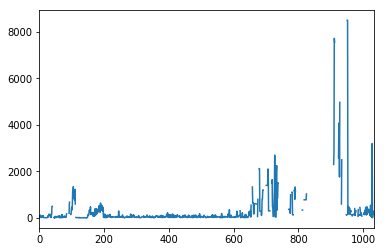

In [139]:
%matplotlib inline

df['distance'].plot()

### `Базовая визуализация на основе DataFrame`

Построим гистограмму на выходе значений метода `describe` для пары столбцов:

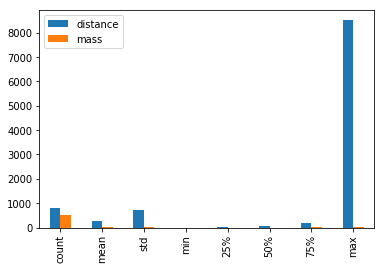

In [140]:
df.describe()[['distance', 'mass']].plot.bar()

### `Базовая визуализация на основе DataFrame`

Построим круговую диаграмму значений столбца:

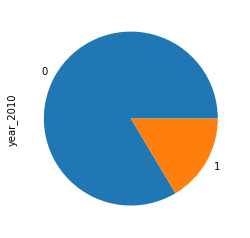

In [155]:
df['year_2010'] = df['year'].apply(lambda x: int(x > 2012))
df['year_2010'].value_counts().plot.pie()

### `Библиотека Matplotlib`

- Один из основных инструментов для визуализации разнообразных 2D и 3D графиков и диаграм<br><br>
- Позволяет создавать как статические, так и анимированные изображения<br><br>
- Поддерживаются много растровых и векторных форматов<br><br>
- Гибкая система настроек позволяет управлять внешним видом графика, комбинированием графиков, оформлением полотна, легенды и т.д.<br><br>
- На странице библиотеки есть вводный туториал: https://matplotlib.org/tutorials/introductory/pyplot.html#using-mathematical-expressions-in-text<br><br>
- У проекта хорошая документация, часто можно найти похожую на нужную диаграмму и кастомизировать её код под свои нужды (см. галерею https://matplotlib.org/3.1.1/gallery/index.html)<br><br>
- Возможность библиотеки очень велики, рассмотрим ниже несколько относительно простых примеров

### `Самый простой график`

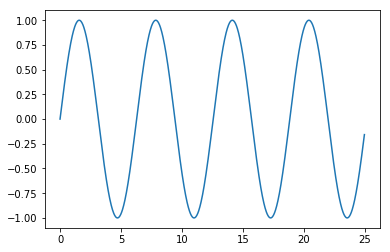

In [171]:
import matplotlib
import matplotlib.pyplot as plt

x = np.array(range(0, 1000, 1)) / 40
y = np.sin(x)

plt.figure()
plt.plot(x, y)

### `Немного форматирования, и выглядит лучше`

Text(0.5, 1.0, 'Plot function "y = sin(x)"')

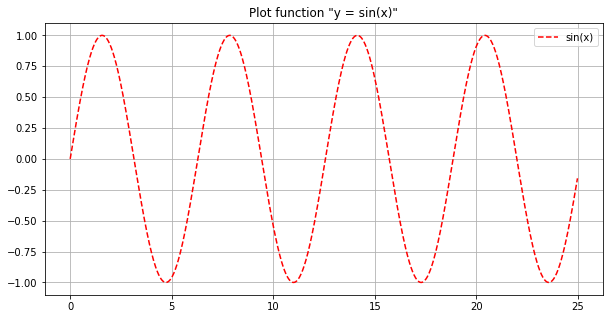

In [181]:
x = np.array(range(0, 1000, 1)) / 40
y = np.sin(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r--')

plt.legend(['sin(x)'], loc='upper right')
plt.grid(True)
plt.title('Plot function "y = sin(x)"')

### `Можно размещать несколько графиков на одном полотне`

Text(0.5, 1.0, 'Plot function "y = sin(x)"')

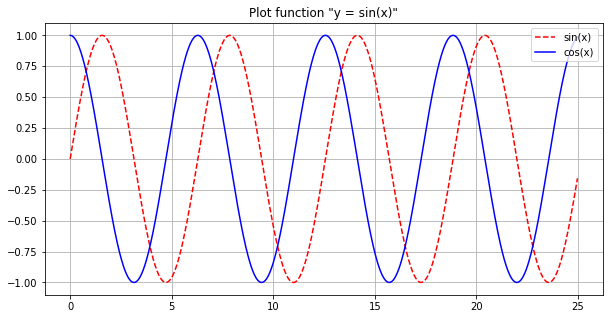

In [182]:
x = np.array(range(0, 1000, 1)) / 40
y, y_2 = np.sin(x), np.cos(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r--')
plt.plot(x, y_2, 'b')

plt.legend(['sin(x)', 'cos(x)'], loc='upper right')
plt.grid(True)
plt.title('Plot function "y = sin(x)"')

### `Можно размещать несколько графиков рядом`

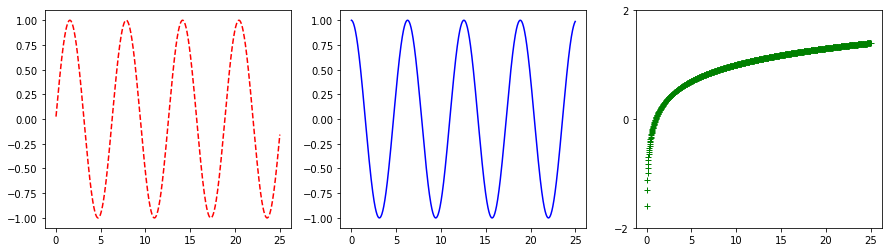

In [251]:
x = np.array(range(1, 1000, 1)) / 40
y, y_2, y_3 = np.sin(x), np.cos(x), np.log10(x)

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(x, y, 'r--')

plt.subplot(1, 3, 2)
plt.plot(x, y_2, 'b')

plt.subplot(1, 3, 3)
plt.ylim((-2.0, 2.0))
plt.yticks(ticks=[-2.0, 0.0, 2.0])
plt.plot(x, y_3, 'g+')

plt.show()

### `Визуализация выборки`

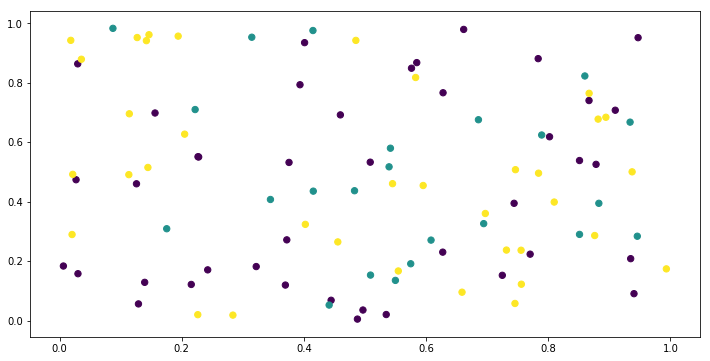

In [224]:
num_samples = 100
x, y = np.random.rand(num_samples), np.random.rand(num_samples)
labels = np.random.randint(low=0, high=3, size=num_samples)

plt.figure(figsize=(12, 6))
plt.scatter(x, y, s=40, c=labels)  # s - area of circles
plt.show()

In [248]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# helper function for visualization

# level parameter should be tuned by hand for more convenient sight

def plot_results(model, X, y, level=1.0, cmap=plt.cm.OrRd, use_decision_function=True, plot_logreg=False):
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(1, figsize=(8, 5))
    plt.clf()

    if hasattr(model, "support_vectors_"):
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
                    facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=cmap, s=50)

    plt.axis('tight')

    x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
    x_bound = np.abs(x_max - x_min) / 10.0
    x_min -= x_bound
    x_max += x_bound

    y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
    y_bound = np.abs(y_max - y_min) / 10.0
    y_min -= y_bound
    y_max += y_bound

    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

    if hasattr(model, "decision_function") and use_decision_function:
        Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    else:
        Z = model.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(1, figsize=(6, 5))
    plt.pcolormesh(XX, YY, Z, cmap=cmap)
    if hasattr(model, "support_vectors_"):
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-level, 0, level])
    elif plot_logreg:
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1e-10, 0, 1e+10])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.show()

### `Визуализация выборки и разделяющей поверхности`

Здесь код уже большой и менее понятный, но всё равно легко гуглится (основа этого примера взята с сайта https://scikit-learn.org)

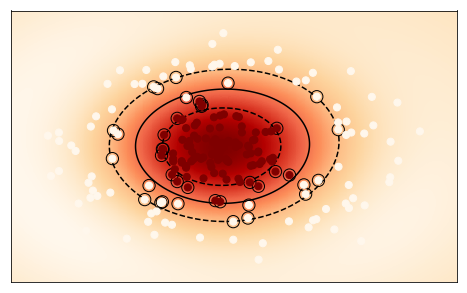

In [249]:
from sklearn.datasets import make_circles
from sklearn import svm

X, y = make_circles(noise=0.2, factor=0.2, random_state=1, n_samples=200)

model = svm.SVC(kernel='rbf', C=1.0, gamma=1.0)
model.fit(X, y)

plot_results(model, X, y, level=0.98)

## `Спасибо за внимание!`